In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [38]:
pip install --upgrade scikit-learn

In [39]:
from google.colab import files
uploded=files.upload()

Saving Regrerssion_energy_production_data.csv to Regrerssion_energy_production_data (1).csv


In [3]:
### 1.	Data Cleaning and Preparation:
 # ●	Load the dataset into a DataFrame or equivalent data structure.
#●	Handle missing values appropriately (e.g., imputation, deletion).
#●	Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).
#●	Detect and treat outliers if necessary.

In [40]:
df=pd.read_csv('Regrerssion_energy_production_data.csv',sep=';')

In [41]:
df.head()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58


In [42]:
df.shape

(9568, 5)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperature        9568 non-null   float64
 1   exhaust_vacuum     9568 non-null   float64
 2   amb_pressure       9568 non-null   float64
 3   r_humidity         9568 non-null   float64
 4   energy_production  9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [44]:
df.describe()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


Missing Values

In [45]:
df.isnull().sum()

,0
temperature,0
exhaust_vacuum,0
amb_pressure,0
r_humidity,0
energy_production,0


Removing duplicates

In [46]:
df.duplicated().sum()

41

In [47]:
df.drop_duplicates(ignore_index=True,inplace=True)

In [48]:
df.duplicated().sum()

0

Remove outliers

<Axes: >

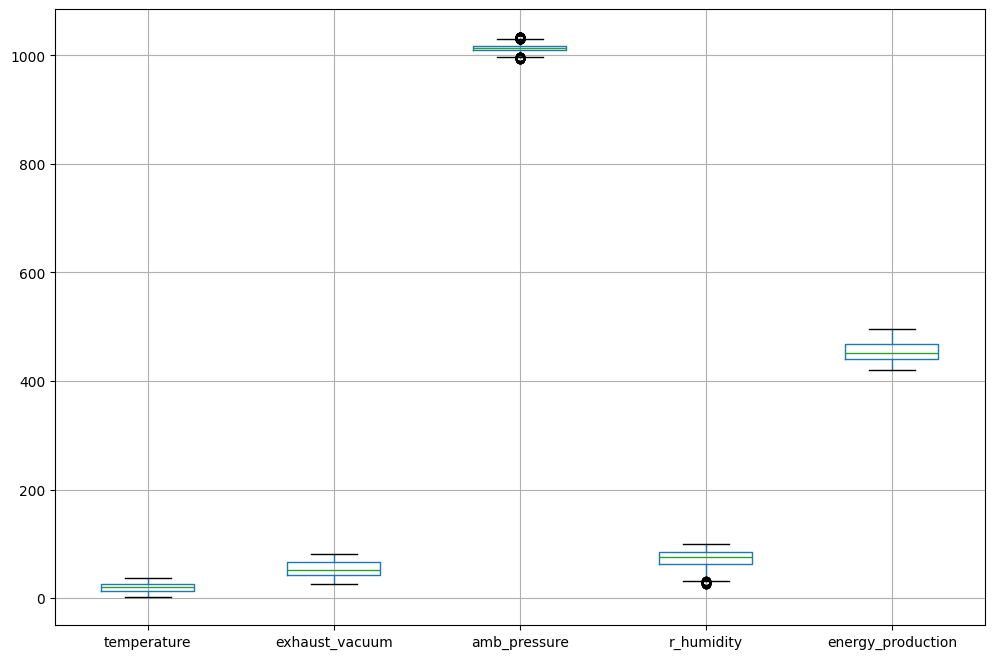

In [49]:
figure=plt.figure(figsize=(12,8))
df.boxplot()

In [50]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
IQR

,0
temperature,12.180
exhaust_vacuum,24.770
amb_pressure,8.115
r_humidity,21.475
energy_production,28.615


In [51]:
lower_quantile=Q1-(1.5*IQR)
lower_quantile

,0
temperature,-4.7400
exhaust_vacuum,4.5850
amb_pressure,996.9125
r_humidity,31.1625
energy_production,396.8275


In [52]:
upper_quantile=Q3+(1.5*IQR)
upper_quantile


,0
temperature,43.9800
exhaust_vacuum,103.6650
amb_pressure,1029.3725
r_humidity,117.0625
energy_production,511.2875


In [53]:
df_outliers=df[(df<lower_quantile) | (df>upper_quantile)]
df_outliers.count()

,0
temperature,0
exhaust_vacuum,0
amb_pressure,91
r_humidity,13
energy_production,0


In [54]:
df_no_outliers=df[(df>lower_quantile) & (df<upper_quantile)]
df_no_outliers

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58
...,...,...,...,...,...
9522,17.10,49.69,1005.53,81.82,457.32
9523,24.73,65.34,1015.42,52.80,446.92
9524,30.44,56.24,1005.19,56.24,429.34
9525,23.00,66.05,1020.61,80.29,421.57


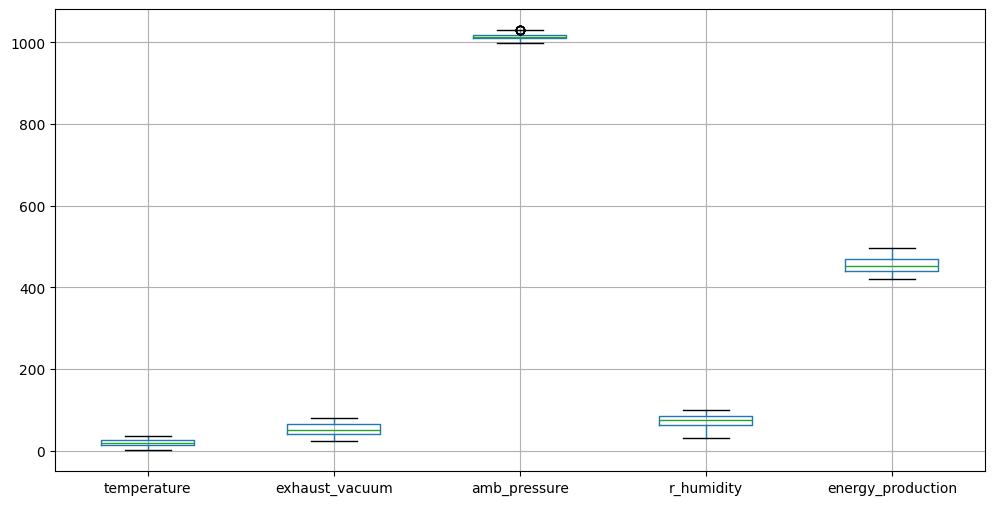

In [55]:
figure=plt.figure(figsize=(12,6))
df_no_outliers.boxplot()
plt.show()

In [56]:
df.corr()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
temperature,1.000000,0.843689,-0.508222,-0.543947,-0.947908
exhaust_vacuum,0.843689,1.000000,-0.415718,-0.312214,-0.869900
amb_pressure,-0.508222,-0.415718,1.000000,0.101631,0.518687
r_humidity,-0.543947,-0.312214,0.101631,1.000000,0.391175
energy_production,-0.947908,-0.869900,0.518687,0.391175,1.000000


In [57]:
## Heatmap

<Axes: >

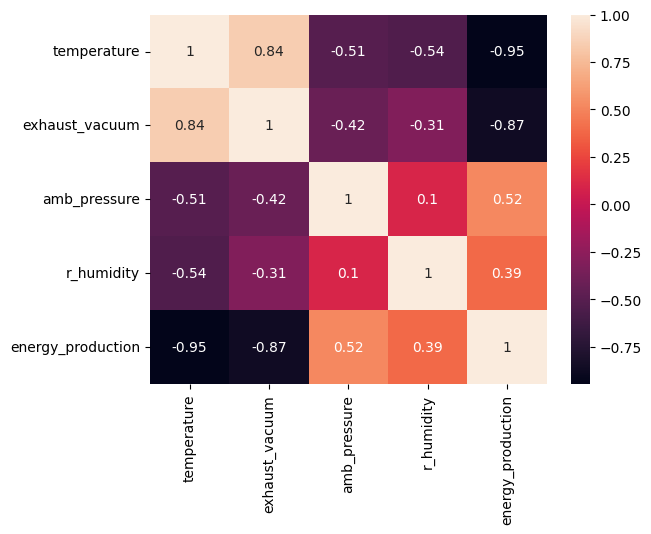

In [58]:
sns.heatmap(df.corr(),annot=True)

In [59]:
## Histogram

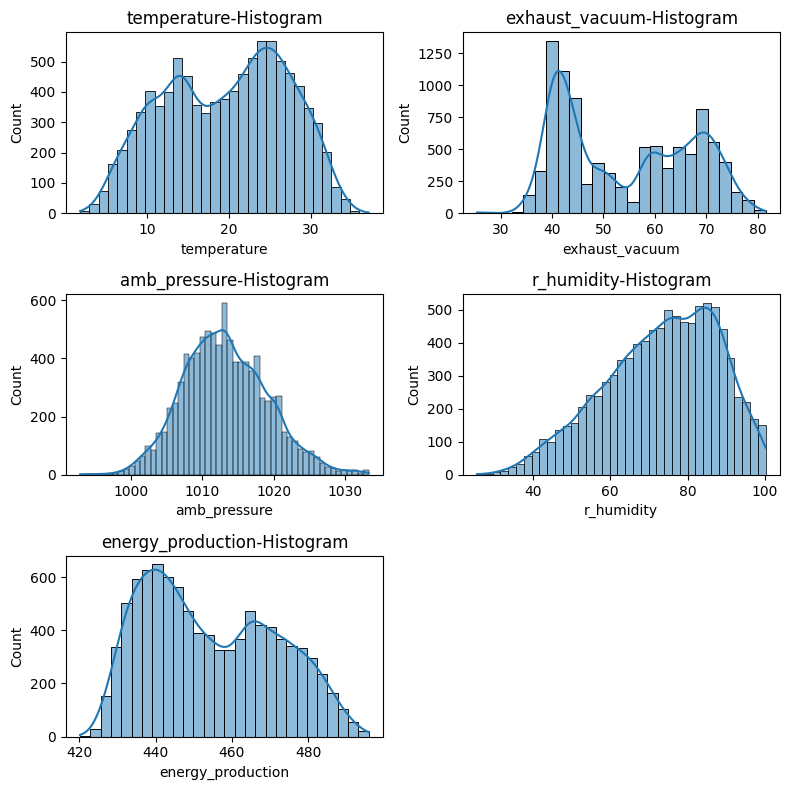

In [60]:
plt.figure(figsize=(8,8))
for i,column in enumerate(df.columns):
    plt.subplot(len(df.columns)//2+1,2,i+1)
    sns.histplot(df[column],kde=True)
    plt.title(f'{(column)}-Histogram')
plt.tight_layout()
plt.show()


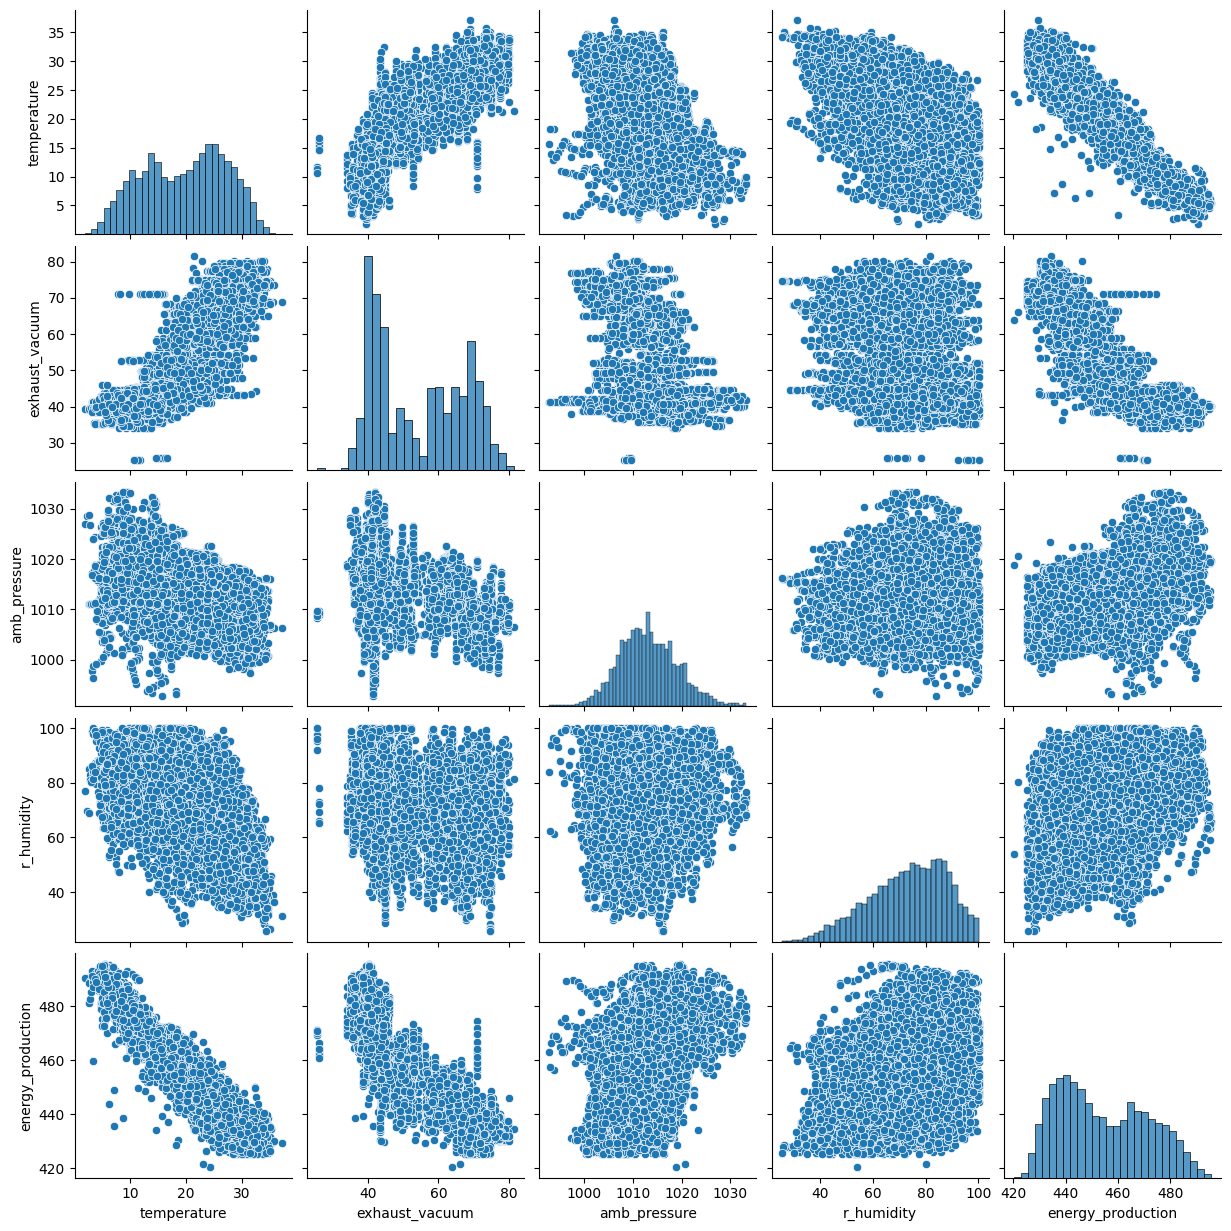

In [ ]:
sns.pairplot(df)

In [61]:
target=df['energy_production']

In [62]:
features=df.drop('energy_production',axis=1)
features

,temperature,exhaust_vacuum,amb_pressure,r_humidity
0,9.59,38.56,1017.01,60.10
1,12.04,42.34,1019.72,94.67
2,13.87,45.08,1024.42,81.69
3,13.72,54.30,1017.89,79.08
4,15.14,49.64,1023.78,75.00
...,...,...,...,...
9522,17.10,49.69,1005.53,81.82
9523,24.73,65.34,1015.42,52.80
9524,30.44,56.24,1005.19,56.24
9525,23.00,66.05,1020.61,80.29


Model Building

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score

In [64]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.80,random_state=42)

In [65]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7621, 4)
(1906, 4)
(7621,)
(1906,)


In [72]:
models={
    'Linear Regression':LinearRegression(),
    'Decision Tree':DecisionTreeRegressor(),
    'Randomforest':RandomForestRegressor(),
    'Support vector':SVR()
}

In [73]:
for model_name,model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2_sc=r2_score(y_test,y_pred)
    print(f"{model_name},Mean Squared Error: {mse:.4f},r2 score:{r2_sc:.4f}")


Linear Regression,Mean Squared Error: 20.8782,r2 score:0.9283
Decision Tree,Mean Squared Error: 19.1360,r2 score:0.9343
Randomforest,Mean Squared Error: 11.1223,r2 score:0.9618
Support vector,Mean Squared Error: 181.6420,r2 score:0.3762


Model Deployement

In [74]:
import pickle

In [75]:
filename = 'trained_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [76]:
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [77]:
input_data = (18.87,52.08,1005.25,99.19)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

[454.33782523]
